In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("https://raw.githubusercontent.com/girikgarg8/ML_and_Data_Science_Datasets/master/USA_Housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


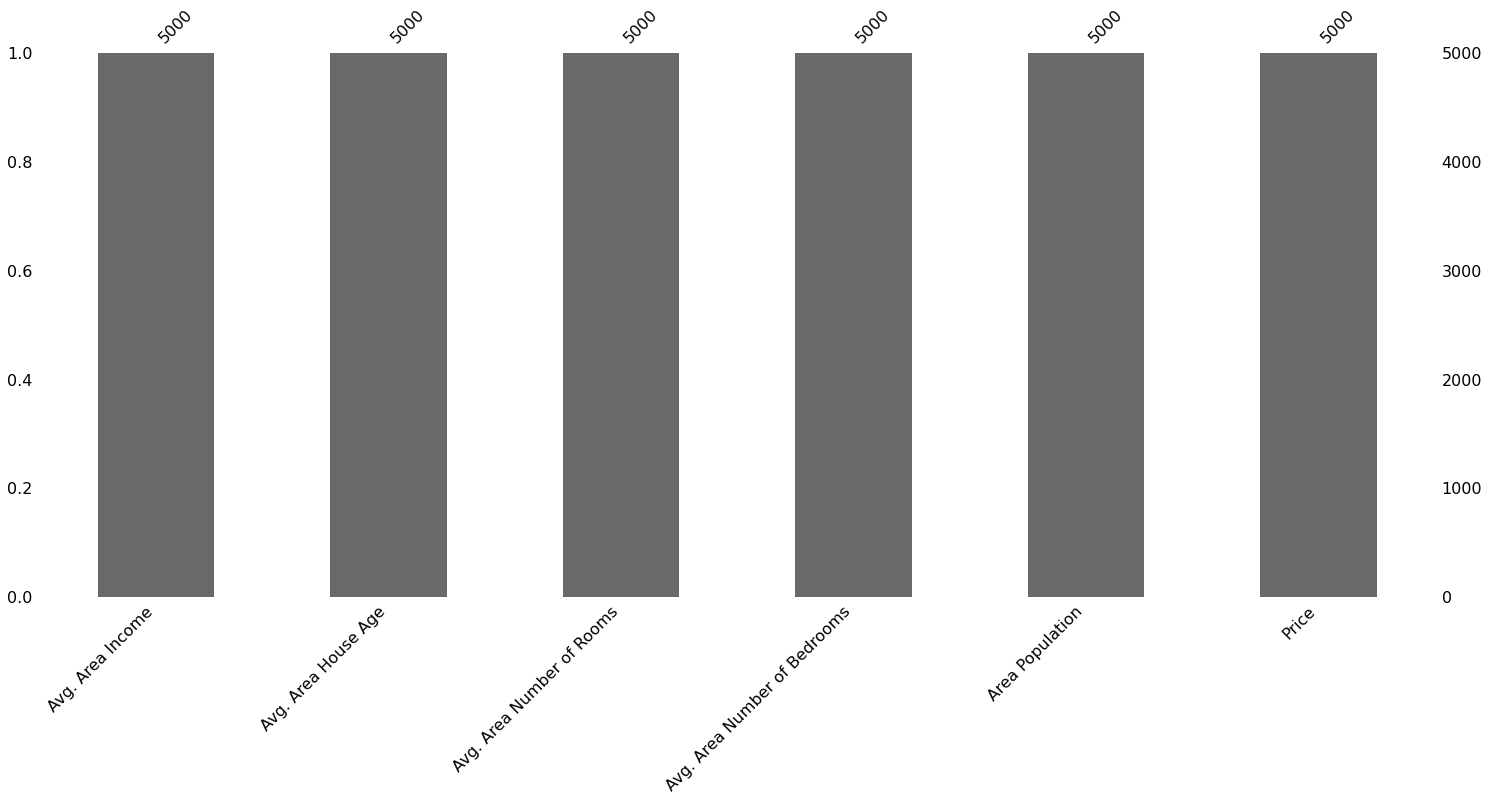

In [ ]:
#Step-1 Removing noise
import missingno as ms
ms.bar(df) #every entry is 5000, so no missing data here

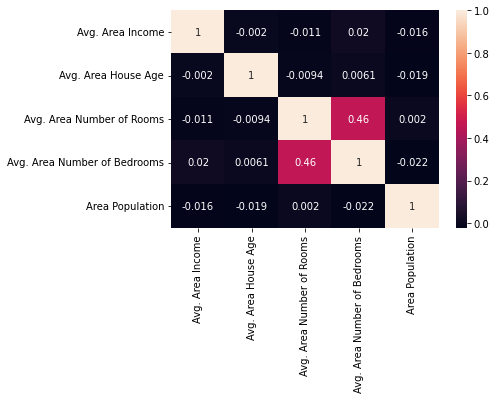

In [ ]:
#Step-2 checking redundancy among input features
import seaborn as sns
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)
#as no two features have correlation greater than equal to 0.7/0.8, feature elimination is not required

In [ ]:
#Step-3 Split input and output features
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1) #-1 means we want pandas to figure out number of rows by itself
print(Y)

[[1059033.558]
 [1505890.915]
 [1058987.988]
 ...
 [1030729.583]
 [1198656.872]
 [1298950.48 ]]


In [ ]:
#Scaling the values of input features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_ScaledOriginal=X_scaled
X_scaled=np.insert(X_scaled,0,values=1,axis=1) #inserting a column of 1's in the X matrix
print(X_scaled)

[[ 1.          1.02865969 -0.29692705  0.02127433  0.08806222 -1.31759867]
 [ 1.          1.00080775  0.02590164 -0.25550611 -0.72230146  0.40399945]
 [ 1.         -0.68462915 -0.11230283  1.5162435   0.93084045  0.07240989]
 ...
 [ 1.         -0.48723454  1.28447022 -2.17026949 -1.50025059 -0.29193658]
 [ 1.         -0.05459152 -0.44669439  0.14154061  1.18205319  0.65111608]
 [ 1.         -0.28831272  0.01521477 -0.19434166  0.07185495  1.04162464]]


In [ ]:
#Train-test split
from sklearn.model_selection import KFold
kf=KFold(n_splits=5)

In [ ]:
#using k-fold 5 times ,calculating regression coefficients 
#also predicting values on test set and performance evaluation

for train_index,test_index in kf.split(X_scaled):
  x_train,x_test,y_train,y_test=X_scaled[train_index],X_scaled[test_index],Y[train_index],Y[test_index]
  A=x_train.T.dot(x_train)
  B=np.linalg.inv(A)
  C=B.dot(x_train.T)
  beta=C.dot(y_train)
  print ('Beta matrix is ')
  print( beta,end='\n \n')
  print ('First five predicted values are ')
  predicted=x_test.dot(beta)
  print (predicted[:5],end='\n \n')
  error=y_test-predicted
  square_error=np.power(error,2)
  sum_square_error=np.sum(square_error)
  y_mean=np.mean(y_test)
  total_variance=np.sum((y_test-y_mean)**2)
  print ("R-square value is ")
  print (1-sum_square_error/total_variance,end='\n \n ')

Beta matrix is 
[[1231872.07704612]
 [ 229923.70318635]
 [ 164052.98579011]
 [ 120923.57426579]
 [   3533.77470973]
 [ 151855.58542488]]
 
First five predicted values are 
[[1222472.59789716]
 [1494131.15197358]
 [1253670.80242078]
 [1120389.19877662]
 [ 844315.19005474]]
 
R-square value is 
0.9175899480765107
 
 Beta matrix is 
[[1232586.40453402]
 [ 228365.32287054]
 [ 165201.14881927]
 [ 122539.46855211]
 [   1697.03433458]
 [ 150055.81710562]]
 
First five predicted values are 
[[ 950080.82206093]
 [ 711724.26608798]
 [1770455.57819769]
 [ 764563.88271977]
 [1572061.16316271]]
 
R-square value is 
0.920301549640113
 
 Beta matrix is 
[[1231448.09063371]
 [ 230730.20810582]
 [ 163554.55706976]
 [ 121669.08713233]
 [   2620.25215054]
 [ 150923.12489298]]
 
First five predicted values are 
[[1231513.14886101]
 [1321188.78204718]
 [ 725691.26810135]
 [ 932558.61953863]
 [1049638.8423876 ]]
 
R-square value is 
0.9152429915320014
 
 Beta matrix is 
[[1.23144707e+06]
 [2.29921558e+05]
 

In [ ]:
#for understading R square error, refer this link https://www.youtube.com/watch?v=YE7E27-FJ90
# R square error is 1-(RSS)/(TSS) where RSS is summation of (y-y hat) square and TSS is summation of (y- y mean) square
#Q1 E PART DOUBT PENDING

In [ ]:
#Q2
  #as dataset is same as previous question, we don't need to load it again or do the prprocessing step
  #splitting data into training,validation and testing dataset
from sklearn.model_selection import train_test_split
x_temp,x_test,y_temp,y_test=train_test_split(X_ScaledOriginal,Y,test_size=0.3)
x_train,x_validation,y_train,y_validation=train_test_split(x_temp,y_temp,test_size=0.2)

In [ ]:
#taking different learning rates and computing the regression coefficients
def gradient_descent(lrate): 
  beta=np.zeros(6) #initialising parametrs as 1, features are from 0 to 4 but as there is one constant beta naught in the multi variable regression, so number of gradients will be 6
  number_of_iterations=1000
  n=x_train.shape[0]
  learning_rate=lrate
  for i in range(number_of_iterations):
    x0_gradient=0
    x1_gradient=0
    x2_gradient=0
    x3_gradient=0
    x4_gradient=0
    x5_gradient=0
    for j in range(len(x_train)):
      a=x_train[j,0]
      b=x_train[j,1]
      c=x_train[j,2]
      d=x_train[j,3]
      e=x_train[j,4]
      f=y_train[j]
      # this is the summation step
      x0_gradient+=(beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f) 
      x1_gradient+=((beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f)*a)
      x2_gradient+=((beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f)*b)
      x3_gradient+=((beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f)*c)
      x4_gradient+=((beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f)*d)
      x5_gradient+=((beta[0]+beta[1]*a+beta[2]*b+beta[3]*c+beta[4]*d+beta[5]*e-f)*e)
      #here beta values are getting updated
      beta[0]=beta[0]-lrate/n*x0_gradient
      beta[1]=beta[1]-lrate/n*x1_gradient
      beta[2]=beta[2]-lrate/n*x2_gradient
      beta[3]=beta[3]-lrate/n*x3_gradient
      beta[4]=beta[4]-lrate/n*x4_gradient
      beta[5]=beta[5]-lrate/n*x5_gradient
  print(beta)

In [ ]:
gradient_descent(0.001)

[1232195.25424092  230115.91700815  164745.11770081  120251.22744207
    4080.05283145  150334.50651989]


In [ ]:
gradient_descent(0.01)

[1227158.00515978  197935.7202638   161819.09345139  202431.9378292
   77833.98765209  151250.64152851]


In [ ]:
gradient_descent(0.1)

[1234248.87532228  295844.82892989   95482.78322867  737399.58434598
 -444673.71686764  117255.41510856]


In [ ]:
gradient_descent(1) #doubt to be discussed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


[nan nan nan nan nan nan]


In [ ]:
# For each set of regression coefficients, compute R2_score for validation and test set and find the best value of regression coefficients. #doubt to be discused

In [ ]:
# Q3
import numpy as np
import pandas as pd
colnames=['symboling','normalized_losses','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df=pd.read_csv('https://raw.githubusercontent.com/girikgarg8/ML_and_Data_Science_Datasets/master/CarPricePrediction.csv',names=colnames)

In [ ]:
df=df.replace('?',np.NaN)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
from sklearn.impute import SimpleImputer
df.dropna(subset=['price'],inplace=True)
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent') #replace NAN with mode
imputer1=imputer.fit(df)
df=pd.DataFrame(imputer1.transform(df)) #pd.DataFrame is required becaude by default imputer returns an ndarray
df.columns=colnames #specifying column names
print(df)

    symboling normalized_losses         make fuel_type aspiration num_doors  \
0           3               161  alfa-romero       gas        std       two   
1           3               161  alfa-romero       gas        std       two   
2           1               161  alfa-romero       gas        std       two   
3           2               164         audi       gas        std      four   
4           2               164         audi       gas        std      four   
..        ...               ...          ...       ...        ...       ...   
196        -1                95        volvo       gas        std      four   
197        -1                95        volvo       gas      turbo      four   
198        -1                95        volvo       gas        std      four   
199        -1                95        volvo    diesel      turbo      four   
200        -1                95        volvo       gas      turbo      four   

      body_style drive_wheels engine_location wheel

In [ ]:
dict1={"one":1,"two":2,"three":3,"four":4,"five":5,"six":6,"seven":7,"eight":8,"nine":9,"zero":0,"twelve":12} #mapping the values
df['num_doors']=df['num_doors'].map(dict1)
df['num_cylinders']=df['num_cylinders'].map(dict1)

In [ ]:
#dummy encoding scheme
dummy_encoding_body_style=pd.get_dummies(df['body_style'],prefix="body_style",drop_first=True)
df=pd.concat([df,dummy_encoding_body_style],axis=1)
df.drop(['body_style'],axis=1,inplace=True)
dummy_encoding_drive_wheels=pd.get_dummies(df['drive_wheels'],prefix="drive_wheels",drop_first=True)
df.drop(['drive_wheels'],axis=1,inplace=True)
df=pd.concat([df,dummy_encoding_drive_wheels],axis=1)
print(df)

    symboling normalized_losses         make fuel_type aspiration  num_doors  \
0           3               161  alfa-romero       gas        std          2   
1           3               161  alfa-romero       gas        std          2   
2           1               161  alfa-romero       gas        std          2   
3           2               164         audi       gas        std          4   
4           2               164         audi       gas        std          4   
..        ...               ...          ...       ...        ...        ...   
196        -1                95        volvo       gas        std          4   
197        -1                95        volvo       gas      turbo          4   
198        -1                95        volvo       gas        std          4   
199        -1                95        volvo    diesel      turbo          4   
200        -1                95        volvo       gas      turbo          4   

    engine_location wheel_base length w

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['make']=encoder.fit_transform(df['make'])
df['aspiration']=encoder.fit_transform(df['aspiration'])
df['engine_location']=encoder.fit_transform(df['engine_location'])
df['fuel_type']=encoder.fit_transform(df['fuel_type'])

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495,0,0,0,0,0,1
1,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500,0,0,0,0,0,1
2,1,161,0,1,0,2,0,94.5,171.2,65.5,...,5000,19,26,16500,0,1,0,0,0,1
3,2,164,1,1,0,4,0,99.8,176.6,66.2,...,5500,24,30,13950,0,0,1,0,1,0
4,2,164,1,1,0,4,0,99.4,176.6,66.4,...,5500,18,22,17450,0,0,1,0,0,0


In [ ]:
#(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.
# https://stackoverflow.com/questions/39104730/pandas-replace-with-default-value Read the default dict solution here
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html Refer this
# https://stackoverflow.com/questions/31511997/pandas-dataframe-replace-all-values-in-a-column-based-on-condition see this too
cond=(df['fuel_system'].str.contains('pfi')==True)
df.loc[cond,'fuel_system']=1
cond2=(df['fuel_system']).str.contains('pfi')==False
df.loc[cond2,'fuel_system']=0

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495,0,0,0,0,0,1
1,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500,0,0,0,0,0,1
2,1,161,0,1,0,2,0,94.5,171.2,65.5,...,5000,19,26,16500,0,1,0,0,0,1
3,2,164,1,1,0,4,0,99.8,176.6,66.2,...,5500,24,30,13950,0,0,1,0,1,0
4,2,164,1,1,0,4,0,99.4,176.6,66.4,...,5500,18,22,17450,0,0,1,0,0,0


In [ ]:
#For engine_type: replace values containing string ohc to 1 else all values to 0.
cond3=(df['engine_type'].str.contains('ohc')==True)
cond4=((df['engine_type']).str.contains('ohc')==False)
df.loc[cond3,'engine_type']=1
df.loc[cond4,'engine_type']=0

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,peak_rpm,city_mpg,highway_mpg,price,body_style_hardtop,body_style_hatchback,body_style_sedan,body_style_wagon,drive_wheels_fwd,drive_wheels_rwd
0,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,13495,0,0,0,0,0,1
1,3,161,0,1,0,2,0,88.6,168.8,64.1,...,5000,21,27,16500,0,0,0,0,0,1
2,1,161,0,1,0,2,0,94.5,171.2,65.5,...,5000,19,26,16500,0,1,0,0,0,1
3,2,164,1,1,0,4,0,99.8,176.6,66.2,...,5500,24,30,13950,0,0,1,0,1,0
4,2,164,1,1,0,4,0,99.4,176.6,66.4,...,5500,18,22,17450,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             201 non-null    object 
 1   normalized_losses     201 non-null    object 
 2   make                  201 non-null    int64  
 3   fuel_type             201 non-null    int64  
 4   aspiration            201 non-null    int64  
 5   num_doors             201 non-null    int64  
 6   engine_location       201 non-null    int64  
 7   wheel_base            201 non-null    object 
 8   length                201 non-null    object 
 9   width                 201 non-null    object 
 10  height                201 non-null    object 
 11  curb_weight           201 non-null    object 
 12  engine_type           201 non-null    object 
 13  num_cylinders         200 non-null    float64
 14  engine_size           201 non-null    object 
 15  fuel_system           2

In [ ]:
# splitting given dataframe into x and y data
x_data=df.loc[:,df.columns!='price']
y_data=df.loc[:,df.columns=='price']

In [ ]:
x_data.info()
y_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   symboling             201 non-null    object
 1   normalized_losses     201 non-null    object
 2   make                  201 non-null    int64 
 3   fuel_type             201 non-null    int64 
 4   aspiration            201 non-null    int64 
 5   num_doors             201 non-null    int64 
 6   engine_location       201 non-null    int64 
 7   wheel_base            201 non-null    object
 8   length                201 non-null    object
 9   width                 201 non-null    object
 10  height                201 non-null    object
 11  curb_weight           201 non-null    object
 12  engine_type           201 non-null    object
 13  num_cylinders         201 non-null    int64 
 14  engine_size           201 non-null    object
 15  fuel_system           201 non-null    ob

In [ ]:
for i in df.columns: #converting data type to number if possible
  #https://stackoverflow.com/questions/54426845/how-to-check-if-a-pandas-dataframe-contains-only-numeric-column-wise
  df[i]=pd.to_numeric(df[i], errors='ignore')
for i in x_data.columns:
  x_data[i]=pd.to_numeric(x_data[i],errors='ignore')
for i in y_data:
  y_data[i]=pd.to_numeric(y_data[i],errors='ignore')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#Scaling the input data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features_to_scale=x_data.select_dtypes(np.number).columns 
# print(df.columns)
x_scaled=scaler.fit_transform(x_data[features_to_scale]) #specifying the columns to normalise
x_Scaled=pd.DataFrame(x_scaled,columns=features_to_scale)
x_data=x_Scaled #assigning the scaled values to x_data
print(x_data)

     symboling  normalized_losses      make  fuel_type  aspiration  num_doors  \
0          1.0           0.502618  0.000000        1.0         0.0        0.0   
1          1.0           0.502618  0.000000        1.0         0.0        0.0   
2          0.6           0.502618  0.000000        1.0         0.0        0.0   
3          0.8           0.518325  0.047619        1.0         0.0        1.0   
4          0.8           0.518325  0.047619        1.0         0.0        1.0   
..         ...                ...       ...        ...         ...        ...   
196        0.2           0.157068  1.000000        1.0         0.0        1.0   
197        0.2           0.157068  1.000000        1.0         1.0        1.0   
198        0.2           0.157068  1.000000        1.0         0.0        1.0   
199        0.2           0.157068  1.000000        0.0         1.0        1.0   
200        0.2           0.157068  1.000000        1.0         1.0        1.0   

     engine_location  wheel

In [ ]:
print(x_data)
print(y_data)

     symboling  normalized_losses      make  fuel_type  aspiration  num_doors  \
0          1.0           0.502618  0.000000        1.0         0.0        0.0   
1          1.0           0.502618  0.000000        1.0         0.0        0.0   
2          0.6           0.502618  0.000000        1.0         0.0        0.0   
3          0.8           0.518325  0.047619        1.0         0.0        1.0   
4          0.8           0.518325  0.047619        1.0         0.0        1.0   
..         ...                ...       ...        ...         ...        ...   
196        0.2           0.157068  1.000000        1.0         0.0        1.0   
197        0.2           0.157068  1.000000        1.0         1.0        1.0   
198        0.2           0.157068  1.000000        1.0         0.0        1.0   
199        0.2           0.157068  1.000000        0.0         1.0        1.0   
200        0.2           0.157068  1.000000        1.0         1.0        1.0   

     engine_location  wheel

In [ ]:
#Train a linear regressor on 70% of data (using inbuilt linear regression function of Python) and test its performance on remaining 30% of data.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.3,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.8680078106543799


In [ ]:
#Dimensional Reduction using PCA
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
pca=PCA(n_components=11)
x_pca=pca.fit_transform(x_data)
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(x_pca,y_data,test_size=0.3,random_state=42)
lr.fit(x_train_pca,y_train_pca)
print(lr.score(x_test_pca,y_test_pca))

0.7711450688666883
